<img src="wzl_rwth.png" style="padding-left: 20px; float: right;" />

<h1 style="color: blue;">Basisseminar Digitalisierung</h1>
<h2 style="color: #D7A5F4;">Anwendungsbeispiel Überwachtes Lernen <br /> Binary Crack Detection</h2>
<h3> Beispiel aus der Fertigung: Erkennen von Rissen auf Oberflächen von Werkstücken</h3>
 




*Generelle Anmerkungen*
- Eine Code-Zelle kann ausgeführt werden, indem man in die Zelle klickt und dann *STRG* & *Enter* drückt

## Probemstellung
Im ersten Notebook ging es um die Erkennung handgeschriebener Zahlen mithilfe eines Künstlichen Neuronalen Netzes. Dieses Notebook beschäftigt sich ebenfalls mit Bildern, allerdings handelt es hierbei um ein binäres Klassifizierungsproblem, die Bilder werden also nur in zwei verschiedene Klassen eingeteilt (im Gegensatz zum Zahlenbeispiel, wo es 9 verschiedene Klassen gab). Hierbei geht es um ein vereinfachtes Szenario welches so auch in der Fertigung auftritt: Auf Basis eines Bildes von der Oberfläche eines Werkstücks, soll automatisch beurteilt werden, ob dieses offensichtliche Defekte, wie beispielsweise einen Riss aufweist. Das bedeutet, im Folgenden soll ein Künstliches Neuronales Netz trainiert werden, welches in der Lage sein soll, ein Bild entweder zur Klasse "Defekt - Riss" oder zur Klasse "Kein Defekt" zuzuordnen.

### Erster Schritt - Bibliothek
Als erstes müssen wieder einige Code-Bibliothek importiert werden, die unter anderem diverse Bauteile, welche für die Erstellung eines Künstlichen Neuronalen Netzes verwendet werden können, in Form von Methoden bereitstellen.

In [1]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D


# dynamische allocation von gpu memory für den fall das tensorflow-gpu benutzt wird
#config = tf.compat.v1.ConfigProto(allow_soft_placement=False)
#config.gpu_options.allow_growth = True
#session = tf.compat.v1.Session(config=config)

# display tensorflow version
print(tf.__version__)

C:\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


2.0.0


### Zweiter Schritt - Hilfsmethoden definieren und Daten einlesen
Zusätzlich zu den in der obigen Zelle importierten Code-Bibliotheken kann man weitere Methoden definieren, um den eigentlichen Arbeitsablauf besser zu strukturieren und um den Code übersichtlicher zu gestalten. <br />
Im ersten Notebook wurden die Daten aus einer zuvor importierten Bibliothek geladen und konnten deshalb quasi ohne Weiteres benutzt werden. In der Realität ist es aber in den allermeisten Fällen so, dass die Daten erst einmal richtig eingelesen und aufbereitet werden müssen, bevor man sie für die eigentliche Klassifizierungsaufgabe verwenden kann. Aus diesem Grund definiert die folgende Zelle Hilfsmethoden, welche dazu genutzt werden können, einen Datensatz Bild für Bild einzulesen. Dabei wird die Größe von jedem Bild an *IMG_SIZE* angepasst. Wie bereits im ersten Notebook erläutert, benötigt man in einem voll verbundenen Künstlichen Neuronalen Netz einen Input-Knoten für jeden Pixel des Bildes, welches man dem Netz zeigen möchte. Da die Bilder im gegebenen Datensatz 227x227 Pixel groß sind, bräuchte man also (nach "Ausrollen" der Pixelwerte in einen Vektor) 51.529 Knoten in der Input Layer. Weil dadurch der Rechenaufwand stark steigt, wird jedes Bild verkleinert, um dem Netz insgesamt weniger Informationen zeigen zu müssen. Dazu korrespondierend kann über die Variable *NUMBER_OF_IMAGES_PER_CLASS* festgelegt werden wie viele der Bilder aus unserem Datensatz verwendet werden sollen um das neuronale Netz zu klassifizieren. Generell gilt natürlich: Je mehr verschiedene Beispiele dem Netz zum Lernen gezeigt werden können, desto besser, allerdings steigt dadurch natürlich auch die dafür benötigte Zeit. Deshalb wurde an dieser Stelle die Anzahl auf 3000 Bilder pro Klasse beschränkt.<br />
Des Weiteren ist die Farbe der Bilder für die Klassifizierung "Riss oder kein Riss auf der Oberfläche" für unseren Fall irrelevant, weshalb weitere Informationen (die wiederum Rechenaufwand bedeuten) dadurch eingegespart werden können, wenn das Bild statt in Farbe, in Graustufen verwendet wird. <br />
Außerdem übernehmen die unten angegebenen Hilfsmethoden Aufgaben wie z. B. das korrekte Gruppieren der Daten in Bilder und zugehörige Label (also Riss bzw. kein Riss), sowie das Anzeigen eines Bildes mit dem assoziierten Label. <br />
All diese Methoden können im weiteren Verlauf einfach benutzt werden, ohne sich Gedanken über die eigentliche Funktionsweise machen zu müssen, können also als eine Art Bauteil betrachtet werden, welches uns zur Verfügung steht.

In [2]:
from hilfsfunktionen import preprocessData

Um nun den Datensatz einzulesen und aufzubereiten reicht jetzt ein einfacher Aufruf der zuvor definierten Hilfsmethoden, welche alle nötigen Aufgaben übernehmen. <br />
Als Ergebnis erhält man dann einen Datensatz zum Trainieren und einen zum Testen, welcher wiederum in Bild und Label aufgeteilt wird.

In [3]:
data_train, data_test = preprocessData()

data_X, data_y = prepareXandY(data_train)
data_X_test, data_y_test = prepareXandY(data_test)

#normalize data tf.keras.utils.normalize(data, axis=1)

FileNotFoundError: [WinError 3] Das System kann den angegebenen Pfad nicht finden: 'Datasets/Concrete_Crack_Binary/Negative'

Um ein besseres Verständnis für die Problemstellung zu bekommen, kann man sich die Bilder, welche klassifiziert werden sollen visualisieren und das zugehörige Label anzeigen lassen.

In [6]:
displayImageAndLabelOfData(data_train, start_index=0, shape=(3,3))

NameError: name 'displayImageAndLabelOfData' is not defined

### Dritter Schritt - Neuronales Netzwerk
Im Folgenden ist es Ihre Aufgabe, ein Künstliches Neuronales Netz zu entwerfen, welches möglichst genau Bilder in die zwei Klassen "Defekt - Riss" & "Nicht Defekt" unterteilen kann. Hierzu sollten Sie sich an der im ersten Notebook dokumentierten Architekturen orientieren.
<img src="sequential_model.png" style="width: 492px; height: 322px"/>
In der Code-Zelle unter diesem Bild befindet sich ein Code-Grundgerüst, welches ergänzt werden muss, um ein funktionierendes Künstliches Neuronales Netz erzeugen zu können. <br />
Dabei kann beispielsweise sowohl mit der Anzahl der Hidden-Layers als auch mit der Anzahl der Knoten experimentiert werden, in dem man das Netz jedes mal, nachdem die Struktur verändert wurde, neu trainiert und dabei die sich ändernde *accuracy* im Blick behält.

In [ ]:
###
###  PLAYGROUND
###

# ANFANG MODELL DEFINITION
model = Sequential()
model.add(Flatten())

## HIER KÖNNEN LAYERS HINZUGEFÜGT UND/ODER ENTFERNT WERDEN SOWIE DIE ANZAHL DER KNOTEN PRO LAYER VARIIERT WERDEN
# bsp: model.add(Dense(#ANZAHL KNOTEN, activation=tf.nn.relu))


# ENDE MODELL TRAINIEREN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x=data_X, y=data_y, epochs=5)

#### - Testen
Wie bereits im Vortrag und im ersten Notebook erläutert, wird das Künstliche Neuronale Netz nur mit einem Teil der Daten “trainiert” und mit einem (dem Netz unbekannten) Teil der Daten “getestet”. Damit vermeidet man, dass das Modell einfach nur die Daten abspeichert, ohne eine “echte” Systematik zu lernen (“Overfitting”). Deshalb muss nun getestet werden, ob die Genauigkeit (accuracy) die beim Trainieren erreicht wurde sich auch in den Test-Daten widerspiegelt.

In [ ]:
makePredictionsAndCalculateAccuracy(model, data_X_test, data_y_test)

Dinge die an dieser Stelle **zu beachten** sind:
<ul style="list-style-type:disc;">
    <li>Steigt die Genauigkeit des Netzes beim Trainieren pro Epoche erst an und sinkt ab einer gewissen Epochen-Anzahl wieder? -> Anzahl Epochen verringern.</li>
    <li>Ist die Genauigkeit des Netzes beim Trainieren deutlich höher als auf dem Test-Datensatz? -> Das Netz overfittet die Daten. Mögliche Lösungen: Anzahl der Layers/Knoten pro Layer verringern; Anzahl Epochen verringern.</li>
</ul>

### Vergleich - Mensch vs Maschine
Im Folgenden werden nun ein paar Bilder angezeigt, welche von Ihnen selbst klassifiziert werden müssen. Dazu können Sie einfach in das dabei erscheinende Feld klicken und dort entweder "Ja" oder "Nein" eintippen. Danach wird Ihre Antwort mit der des Künstlichen Neuronalen Netz verglichen.

Weist die im Bild dargestellte Oberfläche einen Defekt auf?


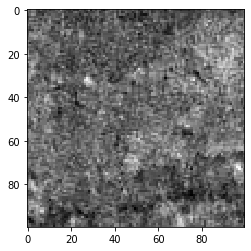

Antworten sie bitte mit Ja oder Nein: nein

Ihre Antwort stimmt mit der des Künstlichen Neuronalen Netzes überein.


Weist die im Bild dargestellte Oberfläche einen Defekt auf?


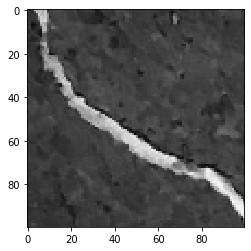

Antworten sie bitte mit Ja oder Nein: ja

Ihre Antwort stimmt mit der des Künstlichen Neuronalen Netzes überein.


Weist die im Bild dargestellte Oberfläche einen Defekt auf?


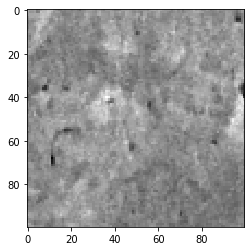

Antworten sie bitte mit Ja oder Nein: nein

Ihre Antwort stimmt mit der des Künstlichen Neuronalen Netzes überein.


Weist die im Bild dargestellte Oberfläche einen Defekt auf?


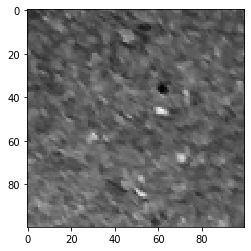

Antworten sie bitte mit Ja oder Nein: nein

Ihre Antwort stimmt mit der des Künstlichen Neuronalen Netzes überein.




In [15]:
humanVSmachine(model, rounds=4)

# Musterlösung

In [16]:
# First approach: Sequential NN
#np.random.seed(16)

model = Sequential()
model.add(Flatten())
model.add(Dense(508, activation=tf.nn.relu))
model.add(Dropout(0.05))
model.add(Dense(254, activation=tf.nn.relu))
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(1, activation=tf.nn.sigmoid))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x=data_X, y=data_y, epochs=5)

makePredictionsAndCalculateAccuracy(model, data_X_test, data_y_test)

Train on 4800 samples
Epoch 1/5
4800/4800 [==============================] - 3s 690us/sample - loss: 117.5963 - accuracy: 0.5635
Epoch 2/5
4800/4800 [==============================] - 3s 634us/sample - loss: 7.5225 - accuracy: 0.7246
Epoch 3/5
4800/4800 [==============================] - 3s 637us/sample - loss: 5.2838 - accuracy: 0.7163
Epoch 4/5
4800/4800 [==============================] - 3s 636us/sample - loss: 1.6528 - accuracy: 0.7713
Epoch 5/5
4800/4800 [==============================] - 3s 636us/sample - loss: 1.7985 - accuracy: 0.7579

Die folgenden Wahrheitswerte sagen aus, ob das Netz das korrespondierende Bild aus dem Test-Datensatz richtig klassifiziert hat. True bedeutet dabei, dass das entsprechende Bild richtig identifiziert wurde, bei False handelt es sich um ein falsch klassifiziertes Bild. Bei Letzterem handelt es sich entweder um ein fälschlicherweise als mit Riss identifiziert Bild, oder um ein Bild welches eigentlich einen Riss aufweist, welcher allerdings nicht vo

In [14]:
# better approach convolutional NN
model = Sequential()

model.add(Conv2D(32, (5,5), input_shape=data_X.shape[1:], activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

model.fit(x=data_X, y=data_y, epochs=2)

makePredictionsAndCalculateAccuracy(model, data_X_test, data_y_test)

Train on 4800 samples
Epoch 1/2
4800/4800 [==============================] - 26s 5ms/sample - loss: 0.9425 - accuracy: 0.9260
Epoch 2/2
4800/4800 [==============================] - 27s 6ms/sample - loss: 0.0803 - accuracy: 0.9804

Die folgenden Wahrheitswerte sagen aus, ob das Netz das korrespondierende Bild aus dem Test-Datensatz richtig klassifiziert hat. True bedeutet dabei, dass das entsprechende Bild richtig identifiziert wurde, bei False handelt es sich um ein falsch klassifiziertes Bild. Bei Letzterem handelt es sich entweder um ein fälschlicherweise als mit Riss identifiziert Bild, oder um ein Bild welches eigentlich einen Riss aufweist, welcher allerdings nicht vom Netz erkannt wurde.
tf.Tensor([ True  True  True  True  True  True  True  True  True  True], shape=(10,), dtype=bool)

Die vom Netz erreichte Genauigkeit auf dem Test-Datensatz beträgt: 
0.990722656
